In [1]:
# load required libraries
import keras
import numpy as np

In [ ]:
!pip install keras-cv
import keras_cv

In [3]:
from keras_cv import visualization

In [4]:
# setting non-max suppression parameters
# intersection over union and confidence threshold
prediction_decoder = keras_cv.layers.NonMaxSuppression(
    bounding_box_format='xywh',
    from_logits=True,
    iou_threshold = 0.2,
    confidence_threshold = 0.7)

In [5]:
# load pre-trained YOLO model
yolo_model = keras_cv.models.YOLOV8Detector.from_preset(
    "yolo_v8_m_pascalvoc",
    bounding_box_format='xywh',
    prediction_decoder=prediction_decoder)

In [6]:
# define class labels
class_ids = [
    "Aeroplane",
    "Bicycle",
    "Bird",
    "Boat",
    "Bottle",
    "Bus",
    "Car",
    "Cat",
    "Chair",
    "Cow",
    "Dining Table",
    "Dog",
    "Horse",
    "Motorbike",
    "Person",
    "Potted Plant",
    "Sheep",
    "Sofa",
    "Train",
    "Tvmonitor",
    "Total",
]
# this will assign integers [0,n] for class labels
class_mappings = dict(zip(range(len(class_ids)), class_ids))

In [7]:
# load test image
test_img = keras.utils.load_img("sample-image.jpg")
test_img = np.array(test_img)

In [8]:
# yolo expects image size (640,640)
resize_image = keras_cv.layers.Resizing(640, 640, pad_to_aspect_ratio=True, bounding_box_format='xywh')
test_batch = resize_image([test_img])

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 640, 640, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


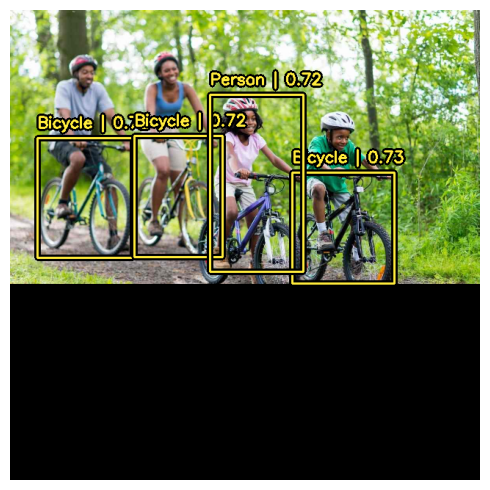

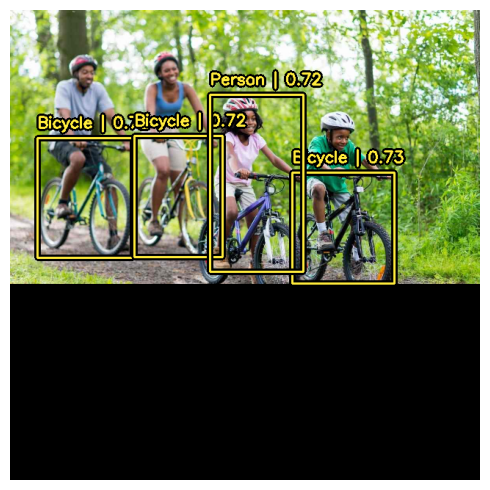

In [9]:
# run prediction on test batch
output = yolo_model.predict(test_batch)

# print output
visualization.plot_bounding_box_gallery(
    test_batch,
    value_range=(0,255),
    bounding_box_format='xywh',
    y_pred=output,
    class_mapping = class_mappings,
    rows = 1,
    cols = 1,
    scale = 5,
    font_scale=0.7
)